# Perplexity Analysis

In [5]:
records[1]

{'Question Type': 'Polite Question', 'Perplexity': 44.111573558942325}

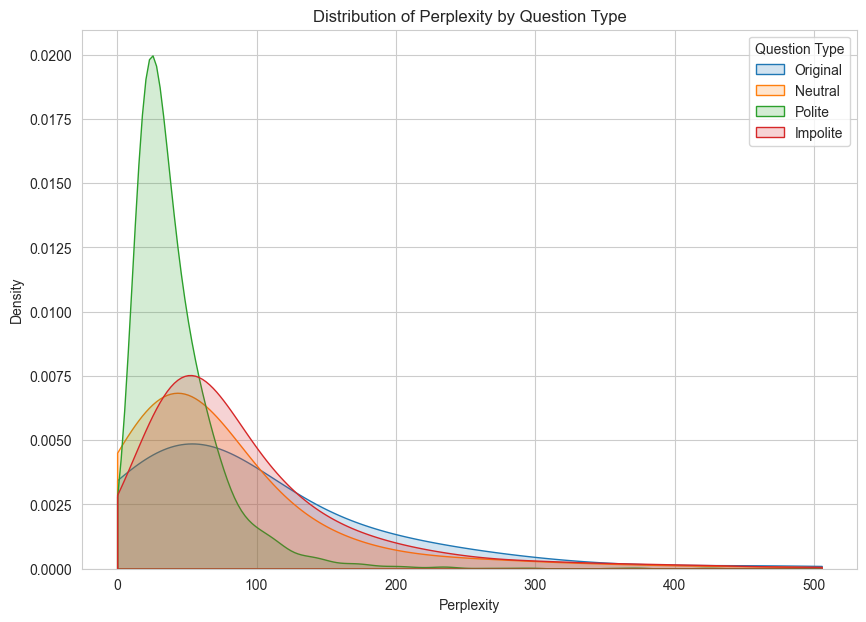

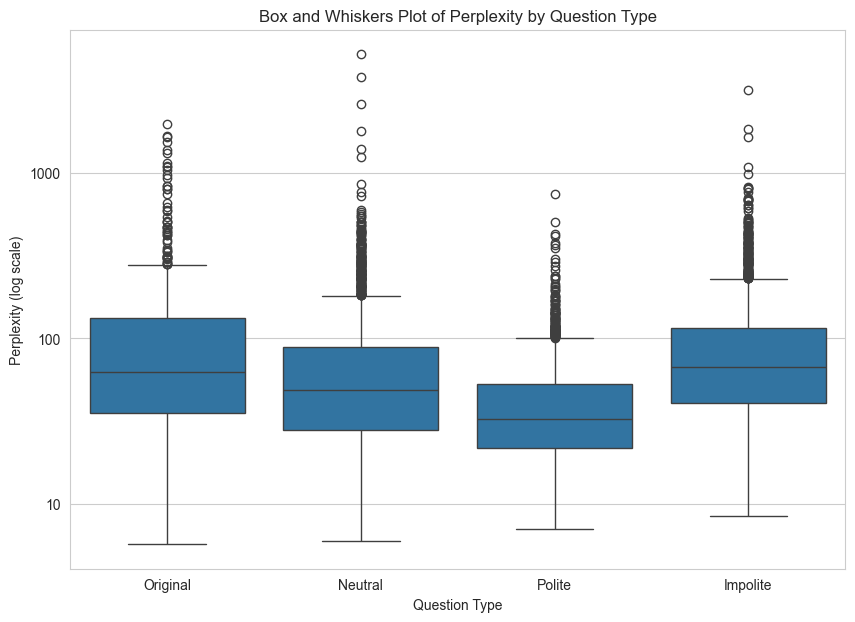

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('model_outputs/perplexity_results.json', 'r') as file:
    data = json.load(file)

# enumerate question types
question_types = [
    'question',
    'neutral_question_1',
    'neutral_question_2',
    'neutral_question_3',
    'polite_question_1',
    'polite_question_2',
    'polite_question_3',
    'impolite_question_1',
    'impolite_question_2',
    'impolite_question_3'
]

# Prepare the data for plotting
records = []
for entry in data:
    for question_type in question_types:
        if question_type in entry and 'perplexity' in entry[question_type]:
            if question_type == 'question':
                name = 'Original'
            else:
                name = question_type.split('_')[0].capitalize()
            records.append({
                'Question Type': name,
                'Perplexity': entry[question_type]['perplexity']
            })

# Convert to DataFrame
df = pd.DataFrame(records)

# Set plot style
sns.set_style('whitegrid')

# Plot the distribution of perplexity by question type
plt.figure(figsize=(10,7))
for question_type in df['Question Type'].unique():
    sns.kdeplot(
        data=df[df['Question Type'] == question_type],
        x='Perplexity',
        label=question_type,
        common_norm=False,
        fill=True,
        alpha=0.2,
        clip=(0, df['Perplexity'].quantile(0.99))
    )
plt.title('Distribution of Perplexity by Question Type')
plt.xlabel('Perplexity')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

import matplotlib.ticker as ticker

# Plot the box and whiskers plot of perplexity by question type with a logarithmic scale
plt.figure(figsize=(10,7))
sns.boxplot(x='Question Type', y='Perplexity', data=df)
plt.yscale('log')
plt.title('Box and Whiskers Plot of Perplexity by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Perplexity (log scale)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

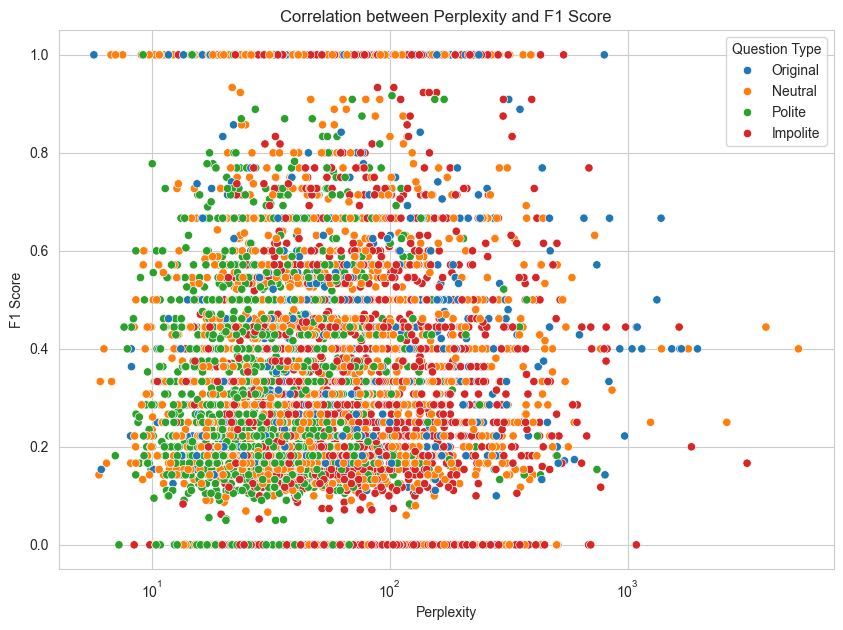

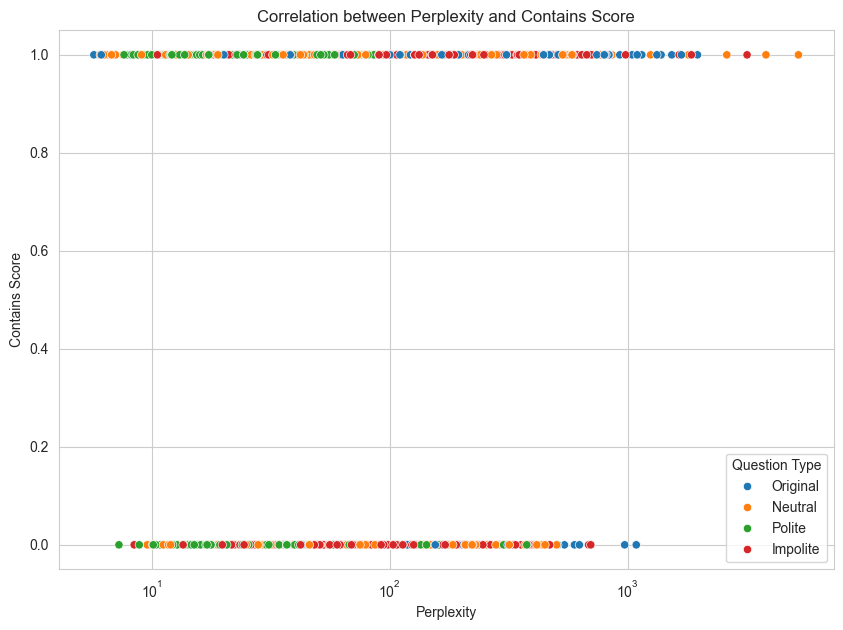

Correlation coefficient between perplexity and contains score: 0.02427968047191412
Correlation coefficient between perplexity and F1 score: 0.028030352555889516


In [38]:
# Load the CSV data
evaluation_df = pd.read_csv('model_outputs/4o-mini_evaluation_results.csv')

# Load the JSON data
with open('model_outputs/perplexity_results.json', 'r') as file:
    perplexity_data = json.load(file)

# Prepare the perplexity data for merging
perplexity_records = []
for entry in perplexity_data:
    for question_type in question_types:
        if question_type in entry and 'perplexity' in entry[question_type]:
            if question_type == 'question':
                answer_type = "question_answer"
            else:
                answer_type = question_type.replace('question', 'answer')
            perplexity_records.append({
                'id': entry.get('id', ''),
                'answer_type': answer_type,
                'perplexity': entry[question_type]['perplexity'],
                'question': entry[question_type].get('question', '')
            })

# Convert to DataFrame
perplexity_df = pd.DataFrame(perplexity_records)

# Merge the evaluation data with the perplexity data
merged_df = pd.merge(evaluation_df, perplexity_df, on=['question', 'answer_type'])

def detect_type(text):
    if text == 'question_answer':
        return 'Original'
    return text[: -len("_answer_X")].capitalize()

merged_df['answer_type'] = merged_df['answer_type'].apply(detect_type)

# Set plot style
sns.set_style('whitegrid')

# Plot correlation between perplexity and F1 score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity', y='F1', hue='answer_type')
plt.title('Correlation between Perplexity and F1 Score')
plt.xlabel('Perplexity')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Plot correlation between perplexity and contains score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity', y='contains', hue='answer_type')
plt.title('Correlation between Perplexity and Contains Score')
plt.xlabel('Perplexity')
plt.ylabel('Contains Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Calculate the correlation coefficient between perplexity and contains score
correlation = merged_df[['perplexity', 'contains']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and contains score: {correlation}')

# Calculate correlation coefficient between perplexity and F1 score
correlation = merged_df[['perplexity', 'F1']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and F1 score: {correlation}')

# Perplexity Per Token

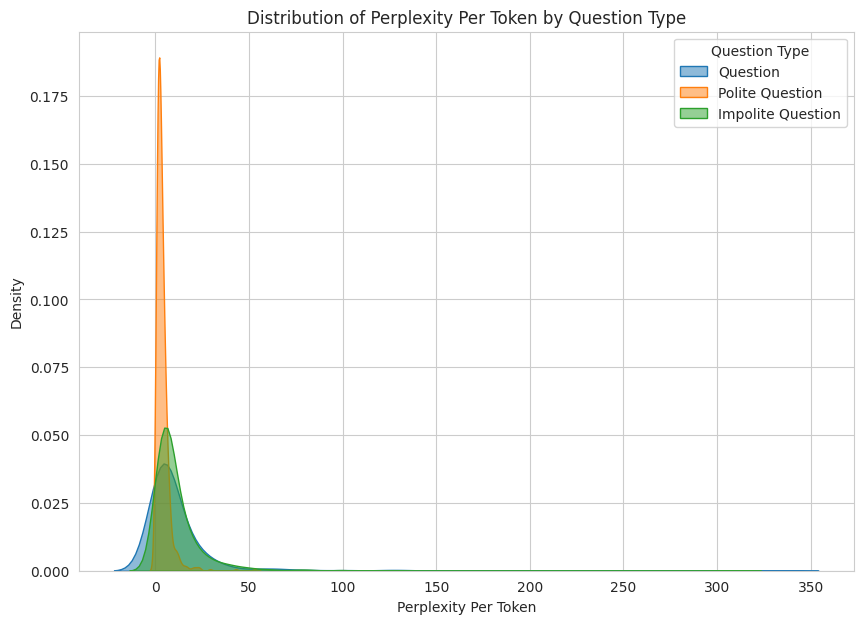

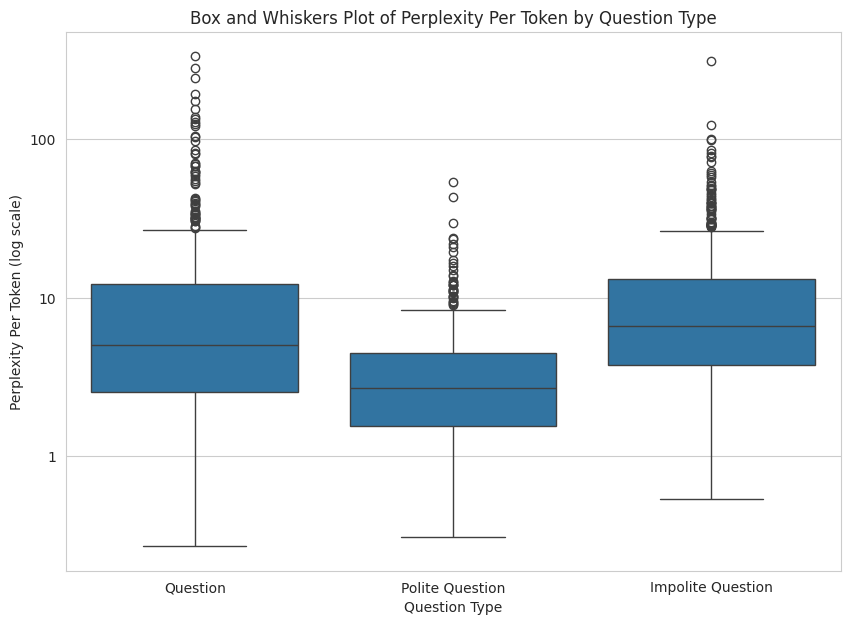

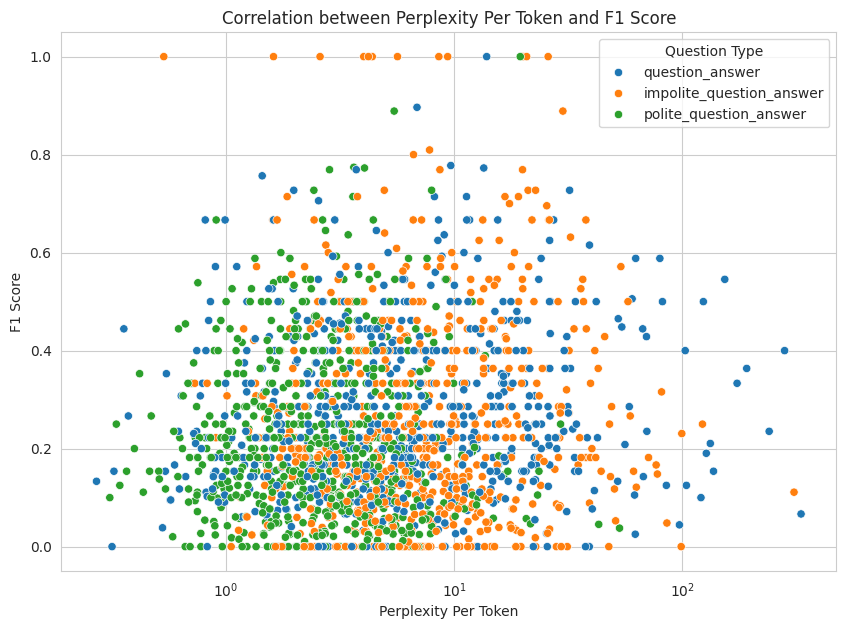

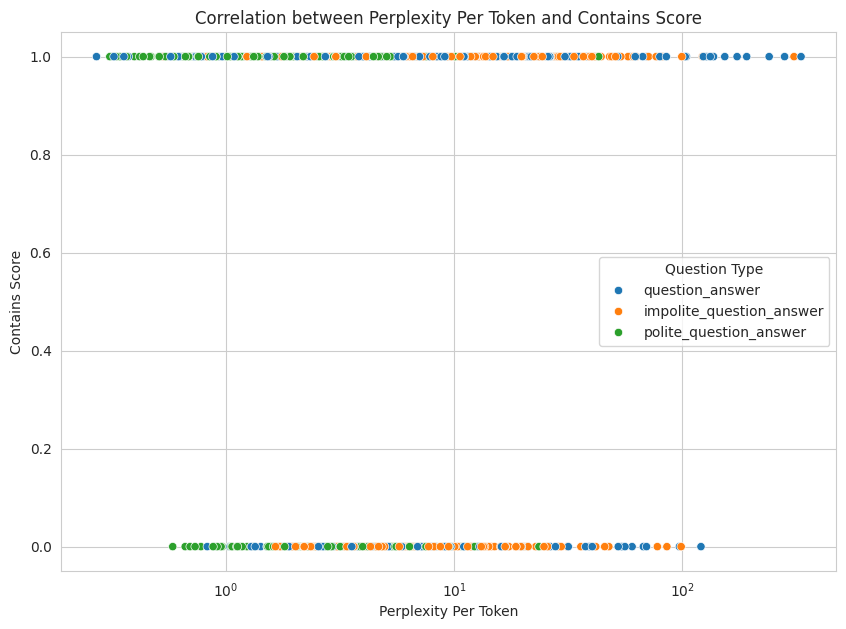

Correlation coefficient between perplexity per token and contains score: 0.0030772153057056716
Correlation coefficient between perplexity per token and F1 score: 0.03585633739918309


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('perplexity_results.json', 'r') as file:
    data = json.load(file)

# Prepare the data for plotting
records = []
for entry in data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity = entry[question_type]['perplexity']
            num_tokens = len(entry[question_type]['tokens'])
            perplexity_per_token = perplexity / num_tokens
            records.append({
                'Question Type': question_type.replace('_', ' ').title(),
                'Perplexity Per Token': perplexity_per_token,
                'num_tokens': num_tokens
            })

# Convert to DataFrame
df = pd.DataFrame(records)

# Set plot style
sns.set_style('whitegrid')

# Plot the distribution of perplexity per token by question type
plt.figure(figsize=(10,7))
for question_type in df['Question Type'].unique():
    sns.kdeplot(
        data=df[df['Question Type'] == question_type],
        x='Perplexity Per Token',
        label=question_type,
        common_norm=False,
        fill=True,
        alpha=0.5
    )
plt.title('Distribution of Perplexity Per Token by Question Type')
plt.xlabel('Perplexity Per Token')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

import matplotlib.ticker as ticker

# Plot the box and whiskers plot of perplexity per token by question type with a logarithmic scale
plt.figure(figsize=(10,7))
sns.boxplot(x='Question Type', y='Perplexity Per Token', data=df)
plt.yscale('log')
plt.title('Box and Whiskers Plot of Perplexity Per Token by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Perplexity Per Token (log scale)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

# Load the CSV data
evaluation_df = pd.read_csv('evaluation_results.csv')

# Prepare the perplexity data for merging
perplexity_records = []
for entry in data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity = entry[question_type]['perplexity']
            num_tokens = len(entry[question_type]['tokens'])
            perplexity_per_token = perplexity / num_tokens
            perplexity_records.append({
                'id': entry.get('id', ''),
                'answer_type': question_type + '_answer',
                'perplexity_per_token': perplexity_per_token,
                'question': entry[question_type].get('question', '')
            })

# Convert to DataFrame
perplexity_df = pd.DataFrame(perplexity_records)

# Merge the evaluation data with the perplexity data
merged_df = pd.merge(evaluation_df, perplexity_df, on=['question', 'answer_type'])

# Set plot style
sns.set_style('whitegrid')

# Plot correlation between perplexity per token and F1 score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity_per_token', y='F1', hue='answer_type')
plt.title('Correlation between Perplexity Per Token and F1 Score')
plt.xlabel('Perplexity Per Token')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Plot correlation between perplexity per token and contains score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity_per_token', y='contains', hue='answer_type')
plt.title('Correlation between Perplexity Per Token and Contains Score')
plt.xlabel('Perplexity Per Token')
plt.ylabel('Contains Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Calculate the correlation coefficient between perplexity per token and contains score
correlation = merged_df[['perplexity_per_token', 'contains']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity per token and contains score: {correlation}')

# Calculate correlation coefficient between perplexity per token and F1 score
correlation = merged_df[['perplexity_per_token', 'F1']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity per token and F1 score: {correlation}')

# Politeness Evaluation

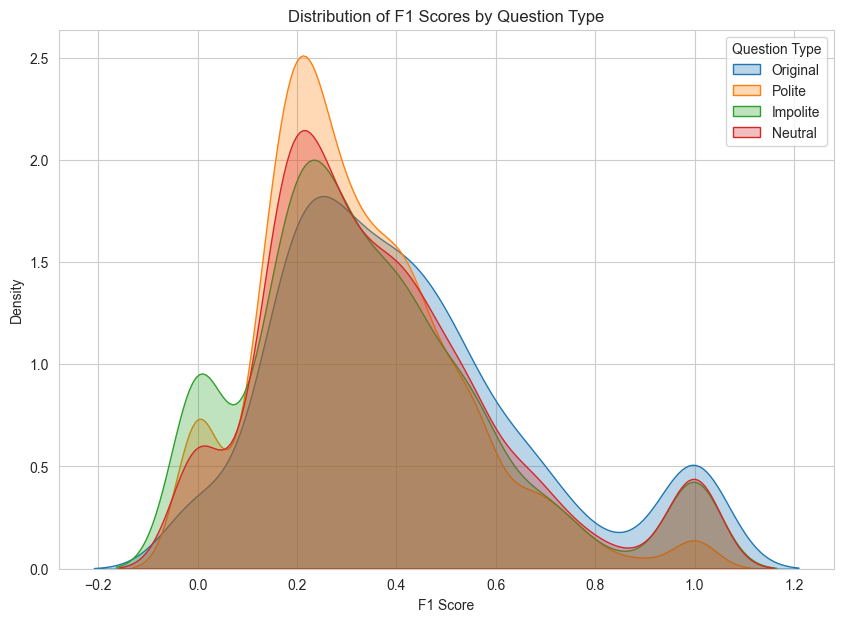

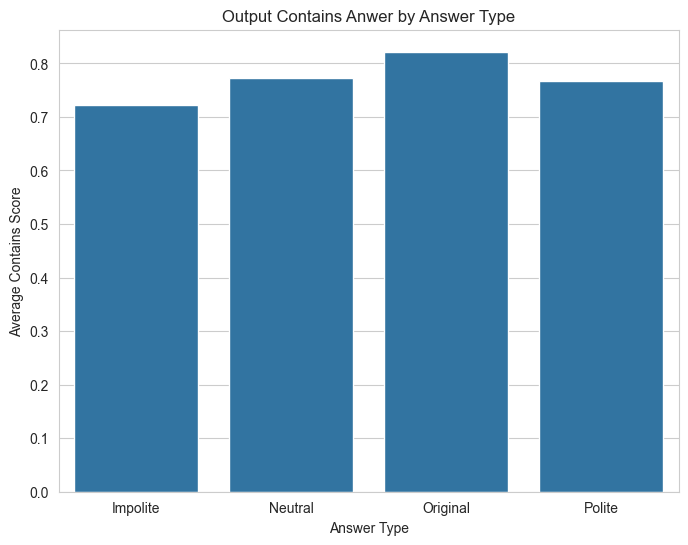

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('model_outputs/4o-mini_evaluation_results.csv')

def detect_type(text):
    if text == 'question_answer':
        return 'Original'
    return text[: -len("_answer_X")].capitalize()

df['answer_type'] = df['answer_type'].apply(detect_type)

# Set plot style
sns.set_style('whitegrid')

# Plot overlapping distributions of F1 scores one at a time
plt.figure(figsize=(10,7))

answer_type_mapping = {
    'Original': 'Original',
    'Polite': 'Polite',
    'Impolite': 'Impolite',
    'Neutral': 'Neutral'
}

for question_type, label in answer_type_mapping.items():
    subset = df[df['answer_type'] == question_type]
    sns.kdeplot(
        data=subset,
        x='F1',
        label=label,
        common_norm=False,
        fill=True,
        alpha=0.3
    )

plt.title('Distribution of F1 Scores by Question Type')
plt.xlabel('F1 Score')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

# Convert 'contains' column to numeric if necessary
df['contains'] = df['contains'].astype(int)

# Group data by 'answer_type' and calculate mean scores
grouped = df.groupby('answer_type', as_index=False).agg({
    'contains': 'mean'
})

# Set plot style
sns.set_style('whitegrid')

# Plot Contains scores
plt.figure(figsize=(8,6))
sns.barplot(x='answer_type', y='contains', data=grouped)
plt.title('Output Contains Anwer by Answer Type')
plt.xlabel('Answer Type')
plt.ylabel('Average Contains Score')
plt.show()

In [42]:
grouped

,answer_type,contains
0,Impolite,0.723054
1,Neutral,0.772455
2,Original,0.821856
3,Polite,0.767964


# Correctness Variations

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/595679695.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')


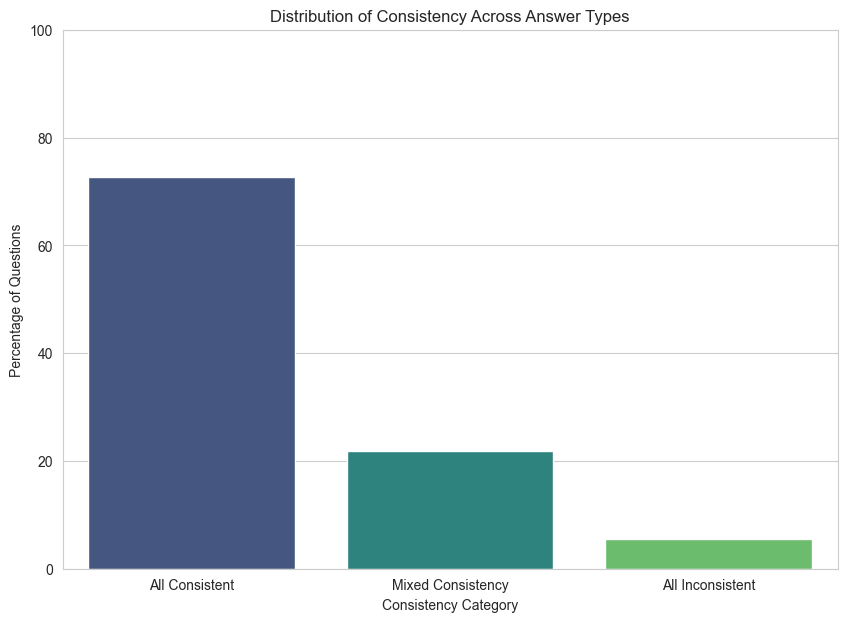

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/595679695.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')


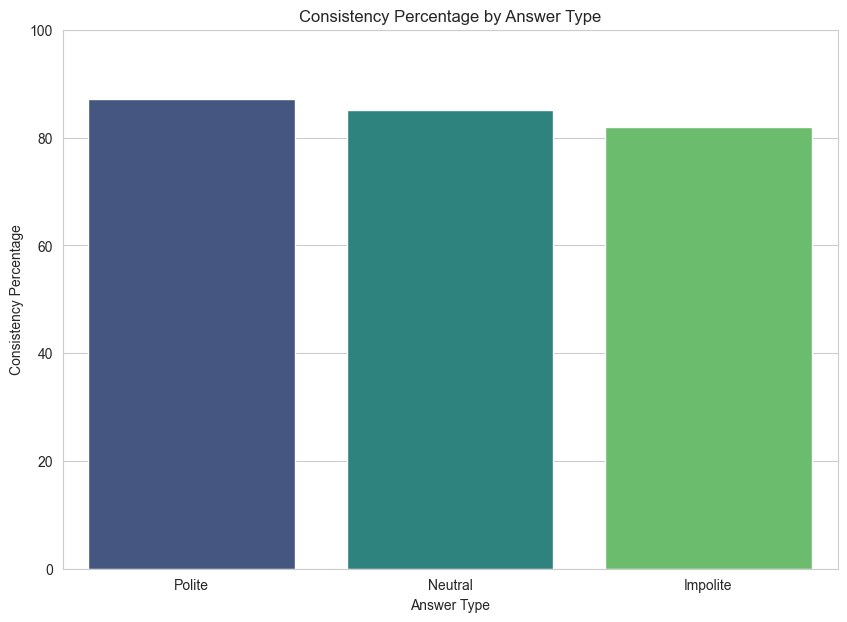

Consistency
All Consistent       72.604790
Mixed Consistency    21.856287
All Inconsistent      5.538922
Name: count, dtype: float64
  Answer Type  Consistency Percentage
0      Polite               87.125749
1     Neutral               85.029940
2    Impolite               81.886228


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv('model_outputs/4o-mini_evaluation_results.csv')

# Pivot the data to have one row per question with columns for each answer type
pivot_df = df.pivot(index='id', columns='answer_type', values='contains')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pivot_df

# Define a function to categorize the consistency of answers
def categorize_consistency(row):
    question_answer = row['question_answer']
    polite_answers = [row['polite_answer_1'], row['polite_answer_2'], row['polite_answer_3']]
    neutral_answers = [row['neutral_answer_1'], row['neutral_answer_2'], row['neutral_answer_3']]
    impolite_answers = [row['impolite_answer_1'], row['impolite_answer_2'], row['impolite_answer_3']]
    
    # Check consistency within each answer type
    polite_consistent = all(answer == question_answer for answer in polite_answers)
    neutral_consistent = all(answer == question_answer for answer in neutral_answers)
    impolite_consistent = all(answer == question_answer for answer in impolite_answers)
    
    # Determine the overall consistency
    if polite_consistent and neutral_consistent and impolite_consistent:
        return 'All Consistent'
    elif not polite_consistent and not neutral_consistent and not impolite_consistent:
        return 'All Inconsistent'
    else:
        return 'Mixed Consistency'

# Apply the function to categorize each row
df['Consistency'] = df.apply(categorize_consistency, axis=1)

# Calculate consistency for each type
df['Polite Consistent'] = df.apply(lambda row: all(row[f'polite_answer_{i}'] == row['question_answer'] for i in range(1, 4)), axis=1)
df['Neutral Consistent'] = df.apply(lambda row: all(row[f'neutral_answer_{i}'] == row['question_answer'] for i in range(1, 4)), axis=1)
df['Impolite Consistent'] = df.apply(lambda row: all(row[f'impolite_answer_{i}'] == row['question_answer'] for i in range(1, 4)), axis=1)

# Count the number of rows in each consistency category
consistency_counts = df['Consistency'].value_counts()

# Calculate the percentage of consistency for each type
polite_consistency_percentage = df['Polite Consistent'].mean() * 100
neutral_consistency_percentage = df['Neutral Consistent'].mean() * 100
impolite_consistency_percentage = df['Impolite Consistent'].mean() * 100

# Calculate the percentage for each consistency category
consistency_percentages = (consistency_counts / consistency_counts.sum()) * 100

# Plot the distribution of consistency categories as percentages
plt.figure(figsize=(10, 7))
sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')
plt.title('Distribution of Consistency Across Answer Types')
plt.xlabel('Consistency Category')
plt.ylabel('Percentage of Questions')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Plot the consistency percentages for each type
consistency_percentages_df = pd.DataFrame({
    'Answer Type': ['Polite', 'Neutral', 'Impolite'],
    'Consistency Percentage': [polite_consistency_percentage, neutral_consistency_percentage, impolite_consistency_percentage]
})

plt.figure(figsize=(10, 7))
sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')
plt.title('Consistency Percentage by Answer Type')
plt.xlabel('Answer Type')
plt.ylabel('Consistency Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Print the percentages for each consistency category
print(consistency_percentages)

# Print the consistency percentages for each type
print(consistency_percentages_df)

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/2558103532.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=polite_consistency_counts.index, y=polite_consistency_counts.values, palette='viridis')


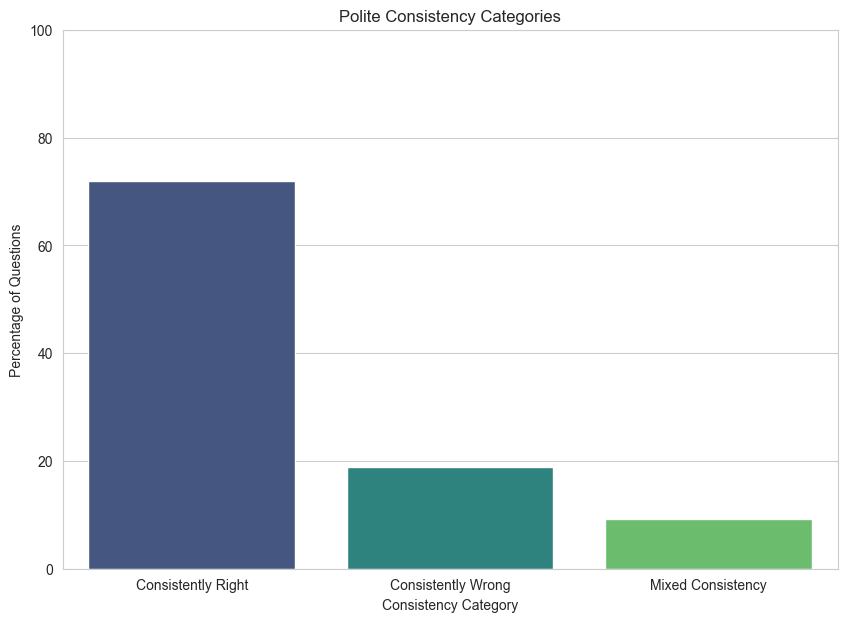

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/2558103532.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neutral_consistency_counts.index, y=neutral_consistency_counts.values, palette='viridis')


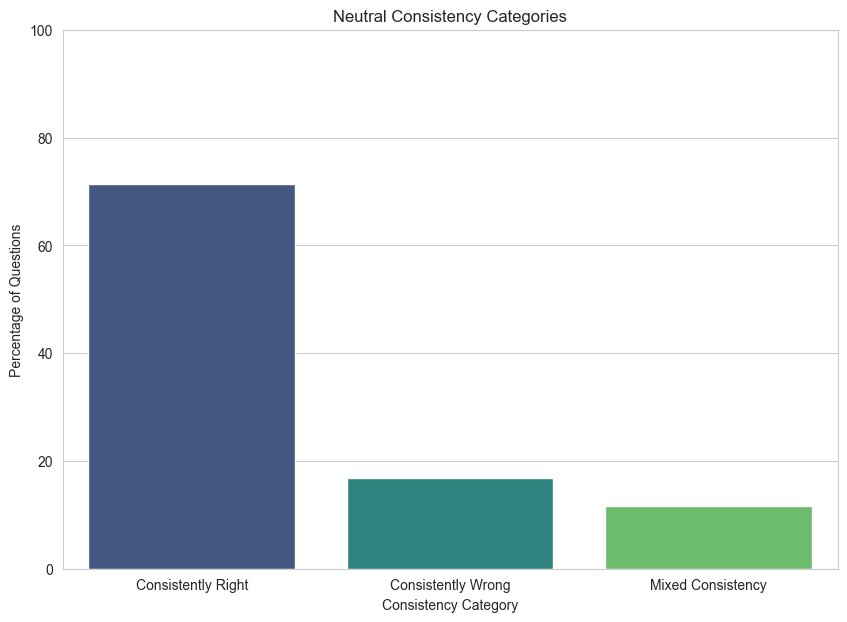

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/2558103532.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impolite_consistency_counts.index, y=impolite_consistency_counts.values, palette='viridis')


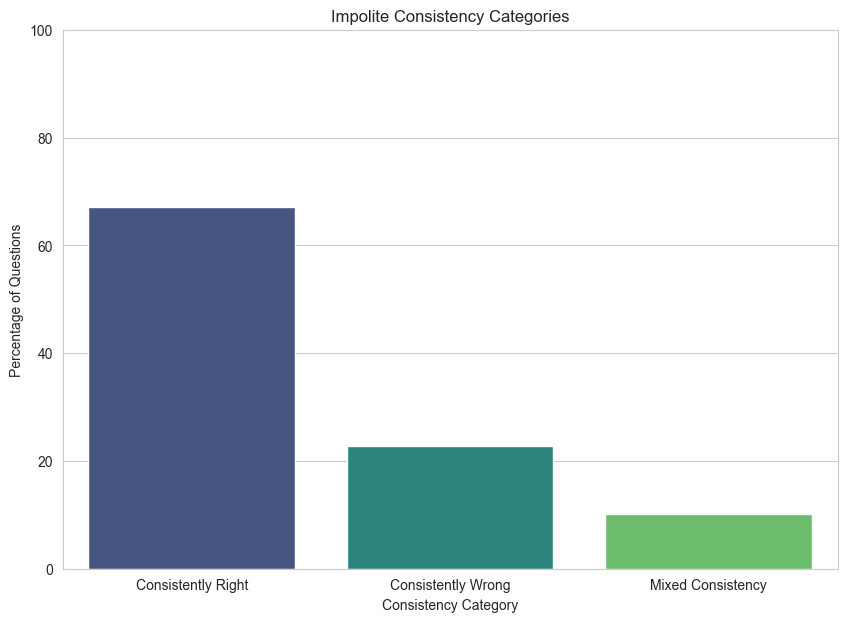

Polite Consistency Counts:
 Polite Consistency
Consistently Right    71.856287
Consistently Wrong    18.862275
Mixed Consistency      9.281437
Name: proportion, dtype: float64
Neutral Consistency Counts:
 Neutral Consistency
Consistently Right    71.407186
Consistently Wrong    16.916168
Mixed Consistency     11.676647
Name: proportion, dtype: float64
Impolite Consistency Counts:
 Impolite Consistency
Consistently Right    67.065868
Consistently Wrong    22.754491
Mixed Consistency     10.179641
Name: proportion, dtype: float64


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to categorize consistency for each type
def categorize_consistency(row, answer_prefix):
    answers = [row[f'{answer_prefix}_answer_{i}'] for i in range(1, 4)]
    if all(answer is True for answer in answers):
        return 'Consistently Right'
    elif all(answer is False for answer in answers):
        return 'Consistently Wrong'
    else:
        return 'Mixed Consistency'

# Apply the function to categorize each row
df['Polite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='polite')
df['Neutral Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='neutral')
df['Impolite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='impolite')

# Count the number of questions in each consistency category for each type
polite_consistency_counts = df['Polite Consistency'].value_counts(normalize=True) * 100
neutral_consistency_counts = df['Neutral Consistency'].value_counts(normalize=True) * 100
impolite_consistency_counts = df['Impolite Consistency'].value_counts(normalize=True) * 100

# Plot the consistency categories for Polite
plt.figure(figsize=(10, 7))
sns.barplot(x=polite_consistency_counts.index, y=polite_consistency_counts.values, palette='viridis')
plt.title('Polite Consistency Categories')
plt.xlabel('Consistency Category')
plt.ylabel('Percentage of Questions')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Plot the consistency categories for Neutral
plt.figure(figsize=(10, 7))
sns.barplot(x=neutral_consistency_counts.index, y=neutral_consistency_counts.values, palette='viridis')
plt.title('Neutral Consistency Categories')
plt.xlabel('Consistency Category')
plt.ylabel('Percentage of Questions')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Plot the consistency categories for Impolite
plt.figure(figsize=(10, 7))
sns.barplot(x=impolite_consistency_counts.index, y=impolite_consistency_counts.values, palette='viridis')
plt.title('Impolite Consistency Categories')
plt.xlabel('Consistency Category')
plt.ylabel('Percentage of Questions')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Print the consistency counts for each type
print("Polite Consistency Counts:\n", polite_consistency_counts)
print("Neutral Consistency Counts:\n", neutral_consistency_counts)
print("Impolite Consistency Counts:\n", impolite_consistency_counts)

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/2189059354.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_consistency_counts.index, y=overall_consistency_counts.values, palette='viridis')


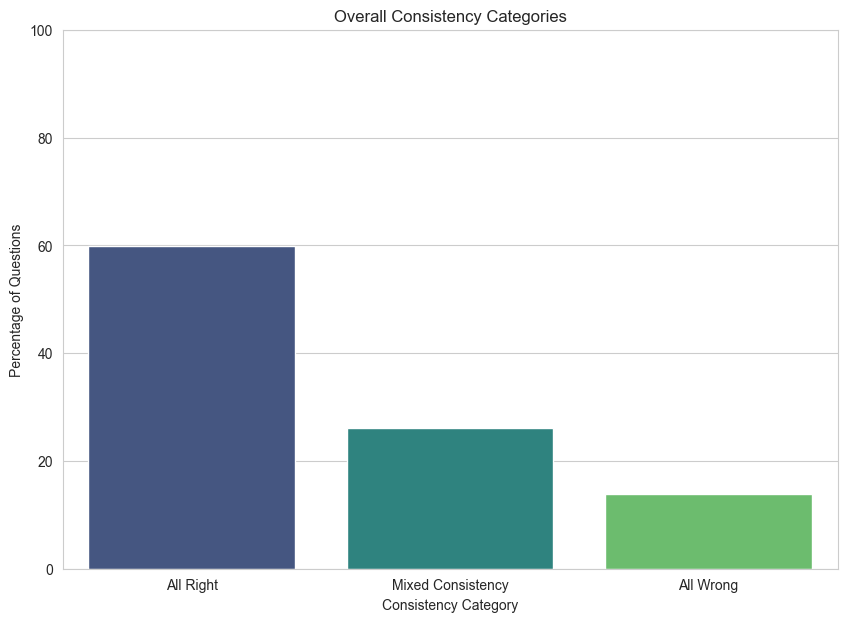

Overall Consistency Counts:
 Overall Consistency
All Right            59.880240
Mixed Consistency    26.197605
All Wrong            13.922156
Name: proportion, dtype: float64


In [62]:
pivot_df

def categorize_overall_consistency(row):
    consistencies = [row['Polite Consistency'], row['Neutral Consistency'], row['Impolite Consistency']]
    if all(consistency == 'Consistently Right' for consistency in consistencies):
        return 'All Right'
    elif all(consistency == 'Consistently Wrong' for consistency in consistencies):
        return 'All Wrong'
    else:
        return 'Mixed Consistency'

# Apply the function to categorize overall consistency
df['Overall Consistency'] = df.apply(categorize_overall_consistency, axis=1)

# Count the number of questions in each overall consistency category
overall_consistency_counts = df['Overall Consistency'].value_counts(normalize=True) * 100

# Plot the overall consistency categories
plt.figure(figsize=(10, 7))
sns.barplot(x=overall_consistency_counts.index, y=overall_consistency_counts.values, palette='viridis')
plt.title('Overall Consistency Categories')
plt.xlabel('Consistency Category')
plt.ylabel('Percentage of Questions')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Print the overall consistency counts
print("Overall Consistency Counts:\n", overall_consistency_counts)

# See best of mixed results

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_26150/2374024129.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Correctness Percentage', data=correctness_percentages_df, palette='viridis')


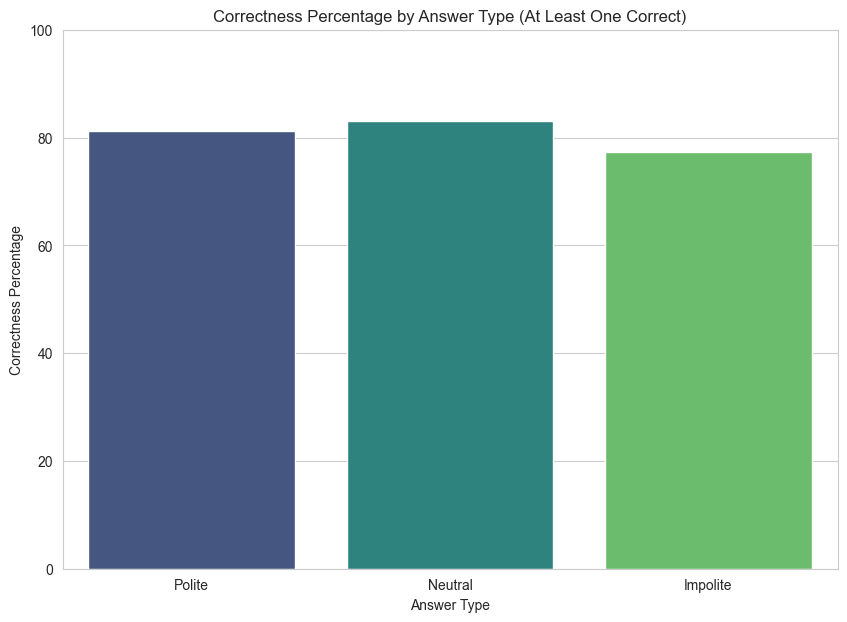

  Answer Type  Correctness Percentage
0      Polite               81.137725
1     Neutral               83.083832
2    Impolite               77.245509


In [51]:
# Define a function to check if at least one of the answers is correct
def at_least_one_correct(row, answer_type):
    return any(row[f'{answer_type}_answer_{i}'] for i in range(1, 4))

# Apply the function to determine correctness for each type
df['Polite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='polite')
df['Neutral Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='neutral')
df['Impolite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='impolite')

# Calculate the percentage of correctness for each type
polite_correct_percentage = df['Polite Correct'].mean() * 100
neutral_correct_percentage = df['Neutral Correct'].mean() * 100
impolite_correct_percentage = df['Impolite Correct'].mean() * 100

# Create a DataFrame for the correctness percentages
correctness_percentages_df = pd.DataFrame({
    'Answer Type': ['Polite', 'Neutral', 'Impolite'],
    'Correctness Percentage': [polite_correct_percentage, neutral_correct_percentage, impolite_correct_percentage]
})

# Plot the correctness percentages for each type
plt.figure(figsize=(10, 7))
sns.barplot(x='Answer Type', y='Correctness Percentage', data=correctness_percentages_df, palette='viridis')
plt.title('Correctness Percentage by Answer Type (At Least One Correct)')
plt.xlabel('Answer Type')
plt.ylabel('Correctness Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Print the correctness percentages for each type
print(correctness_percentages_df)

# Politeness - Accuracy Correlation

In [52]:
# load in dataframes
performance_df = pd.read_csv('model_outputs/4o-mini_evaluation_results.csv')
politeness_evaluation_df = pd.read_csv('model_outputs/politeness_evaluation_results.csv')

## TO BE COMPLETED WITH NEW DATA

# # Melt politeness_evaluation_df to long format
# politeness_melted = politeness_evaluation_df.melt(
#     id_vars=['id'],
#     value_vars=['original_rating', 'polite_rating', 'impolite_rating'],
#     var_name='answer_type',
#     value_name='rating'
# )

# # Map the answer_type in politeness_melted to match values in performance_df
# answer_type_mapping = {
#     'original_rating': 'question_answer',
#     'polite_rating': 'polite_question_answer',
#     'impolite_rating': 'impolite_question_answer'
# }

# politeness_melted['answer_type'] = politeness_melted['answer_type'].map(answer_type_mapping)

# # Merge the dataframes on 'id' and 'answer_type'
# final_df = pd.merge(
#     performance_df[['id', 'answer_type', 'EM', 'F1', 'contains']],
#     politeness_melted[['id', 'answer_type', 'rating']],
#     on=['id', 'answer_type'],
#     how='left'
# )

# # Display the final dataframe
# (final_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'model_outputs/politeness_evaluation_results.csv'

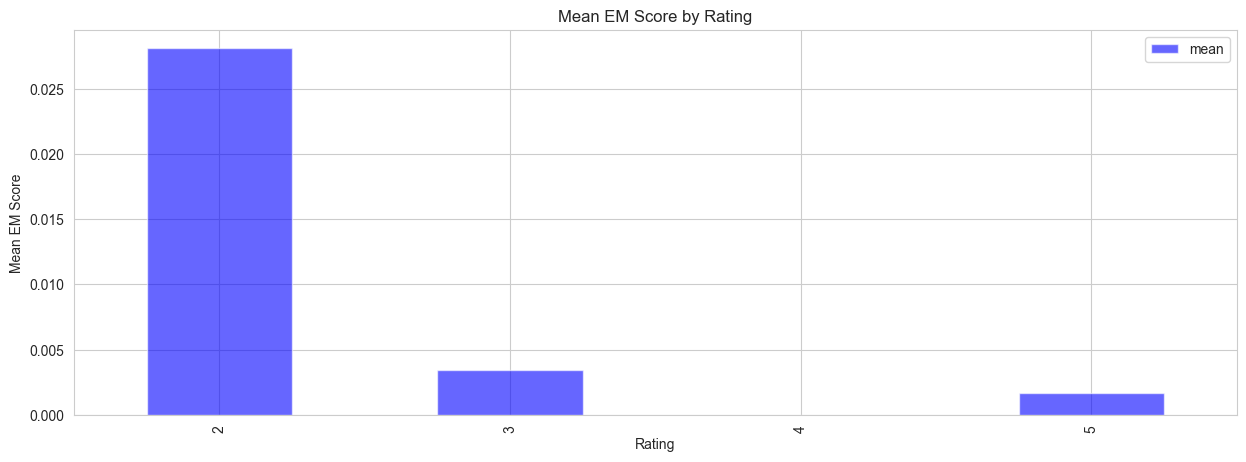

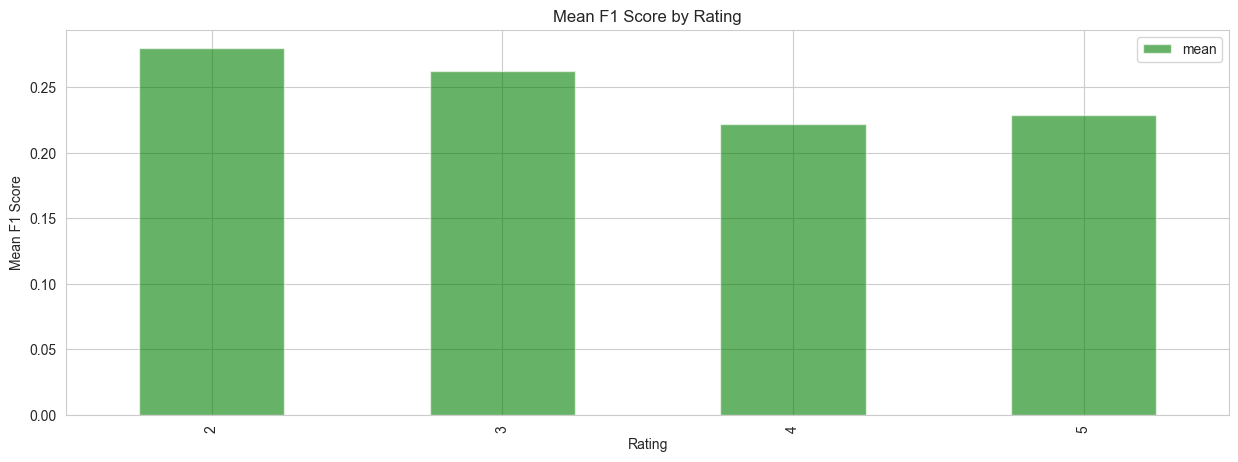

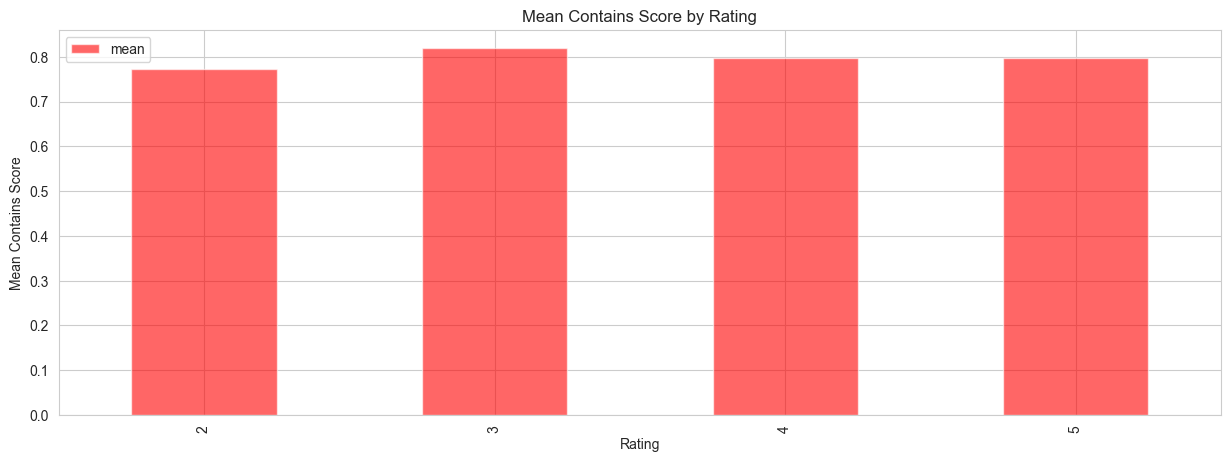

In [26]:
# Group by 'rating' and calculate statistics
rating_stats = final_df.groupby('rating').agg({
    'EM': ['mean', 'median', 'std'],
    'F1': ['mean', 'median', 'std'],
    'contains': ['mean', 'median', 'std']
})

# Display the statistics
(rating_stats)

# Plot the mean scores
rating_stats['EM']['mean'].plot(kind='bar', figsize=(15, 5), legend=True, color='blue', alpha=0.6)
plt.title('Mean EM Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean EM Score')
plt.show()

rating_stats['F1']['mean'].plot(kind='bar', figsize=(15, 5), legend=True, color='green', alpha=0.6)
plt.title('Mean F1 Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean F1 Score')
plt.show()

rating_stats['contains']['mean'].plot(kind='bar', figsize=(15, 5), legend=True, color='red', alpha=0.6)
plt.title('Mean Contains Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Contains Score')
plt.show()